<h1 style='color:green'> Probabilidade e Amostragem com R </h1>

A probabilidade é a medida da chance de um evento ocorrer, enquanto a amostragem é o processo de selecionar uma parte da população para ser analisada. Na Estatística, a amostragem é usada para fazer inferências sobre a população, com base nos resultados obtidos a partir da amostra. A probabilidade é fundamental na amostragem, pois permite estimar a probabilidade de obter uma amostra representativa e a probabilidade de erro na estimativa. Portanto, entender esses conceitos é crucial para a análise de dados e tomada de decisões em diversos campos.

In [1]:
dados <- read.csv('/home/joeldspy/Modelos/datasets/estatistica.csv')

In [2]:
head(dados, 5)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631


# <font color='green'> 1 - Distribuições de Probabilidade </font>

## 1.1 - Distribuição Binomial

Um evento binomial é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de sucesso e fracasso.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

## $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

## $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [3]:
comb <- function (n, k) {
    result <- factorial(n) / (factorial(k) * factorial(n - k))
    return (result)
}

In [4]:
# Interessante mostrar como funciona as combinações
choose(60, 6)

[1] 50063860

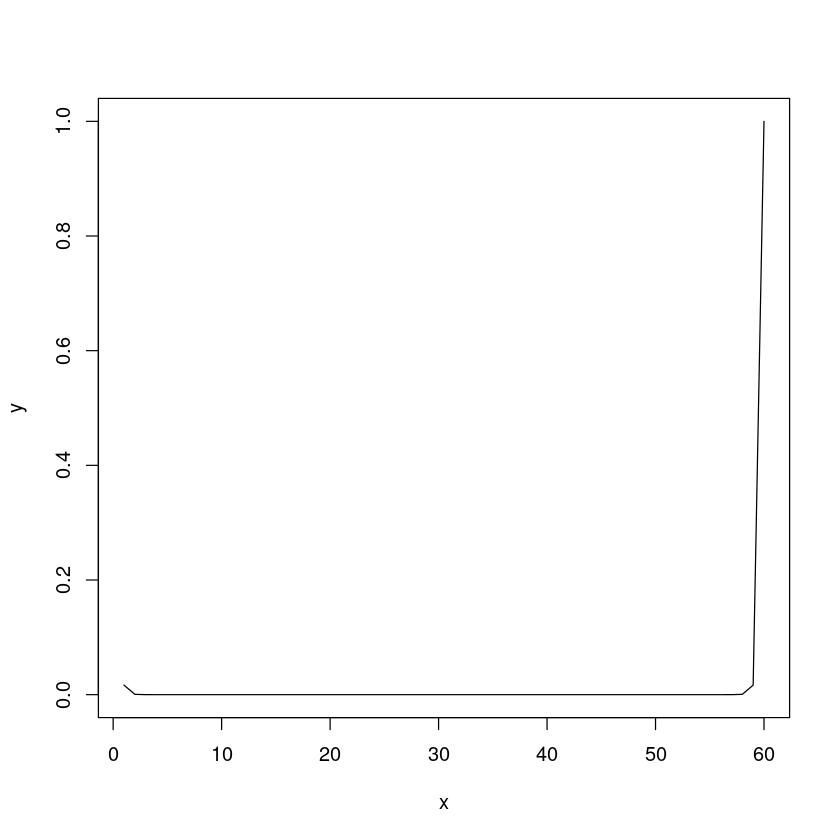

In [5]:
# A probabilidade de ganhar na mega-sena em relação a quantidade de jogos
x <- 1:60
y <- 1 / choose(60, c(x))

plot(x, y, type='l')

### <font color='red'> Problema </font>

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**

In [6]:
n <- 10
k <- 5
p <- 1/3
q <- 1 - p

probabilidade <- choose(n, k) * (p ^ k) * (q ^ (n - k))
probabilidade * 100

[1] 13.65645

In [7]:
binom <- function (n, k, p) {
    q <- 1 - p
    
    return (choose(n, k) * (p ^ k) * (q ^ (n - k)))
}

### <font color='red'> Problema </font>

Calcule a probabilidade de se passar no ENEM, caso a nota de corte fosse 30

In [8]:
sum(binom(n=90, k=30:90, p=1/5))

[1] 0.002073684

In [9]:
# Repare que a probabilidade do aluno acertar 0 é muito pequena
binom(n=90, k=1, p=1/5)

[1] 4.26856e-08

In [10]:
# Mas a probabilidade dele acertar todas é infinitamente menor
binom(n=90, k=90, p=1/5)

[1] 1.23794e-63

In [11]:
# A função mais elegante para resolver esse tipo de problema é dbinom
dbinom(x = 5, size = 10, prob = 1/3)

[1] 0.1365645

In [12]:
sum(dbinom(x = 0:10, size = 10, prob = 1/3))

[1] 1

In [13]:
sum(dbinom(x = 5:10, size = 10, prob = 1/3))

[1] 0.2131281

In [14]:
1 - pbinom(q = 4, size = n, prob = p, lower.tail = TRUE)

[1] 0.2131281

In [15]:
sum(dbinom(x = 0:4, size = 10, prob = 1/3)) == pbinom(q = 4, size = n, prob = p, lower.tail = TRUE)

[1] TRUE

## 1.2 - Distribuição Poisson

A distribuição Poisson é um modelo probabilístico que descreve a probabilidade de ocorrência de um número discreto de eventos em um intervalo de tempo ou espaço, quando esses eventos são raros e aleatórios, e sua taxa média de ocorrência é conhecida. Essa distribuição é caracterizada por um único parâmetro, chamado de parâmetro de Poisson ou de taxa de ocorrência, que indica o número médio de eventos que se espera ocorrer em um determinado intervalo. A distribuição Poisson é amplamente utilizada em diversas áreas, como na modelagem de fenômenos naturais, na análise de dados em epidemiologia e na avaliação de riscos em seguros, entre outras aplicações.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

### <font color='red'> Problema </font>

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

In [16]:
poisson <- function (mu, k) {
    euler <- exp(1)
    
    return ( ( (euler ^ -mu) * (mu ^ k) ) / (factorial(k)) )
}

In [17]:
poisson(20, 15) * 100

[1] 5.164885

In [18]:
# Jeito mais elegante
dpois(x = 15, lambda = 20) * 100

[1] 5.164885

## 1.3 - Distribuição Normal 

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$


### **Tabelas Padronizadas**

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

In [20]:
Z <- seq(0, 3.99, by=0.01)
probabilidade <- pnorm(Z)
tabela_normal_padronizada <- matrix(probabilidade, ncol=10, byrow=TRUE)
colnames(tabela_normal_padronizada) <- format(seq(0.00, 0.09, by=0.01))
rownames(tabela_normal_padronizada) <- format(seq(0.00, 3.90, by=0.10), digits = 2, nsmall = 2)
tabela_normal_padronizada

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000000,0.5039894,0.5079783,0.5119665,0.5159534,0.5199388,0.5239222,0.5279032,0.5318814,0.5358564
0.10,0.5398278,0.5437953,0.5477584,0.5517168,0.5556700,0.5596177,0.5635595,0.5674949,0.5714237,0.5753454
0.20,0.5792597,0.5831662,0.5870644,0.5909541,0.5948349,0.5987063,0.6025681,0.6064199,0.6102612,0.6140919
0.30,0.6179114,0.6217195,0.6255158,0.6293000,0.6330717,0.6368307,0.6405764,0.6443088,0.6480273,0.6517317
0.40,0.6554217,0.6590970,0.6627573,0.6664022,0.6700314,0.6736448,0.6772419,0.6808225,0.6843863,0.6879331
0.50,0.6914625,0.6949743,0.6984682,0.7019440,0.7054015,0.7088403,0.7122603,0.7156612,0.7190427,0.7224047
0.60,0.7257469,0.7290691,0.7323711,0.7356527,0.7389137,0.7421539,0.7453731,0.7485711,0.7517478,0.7549029
0.70,0.7580363,0.7611479,0.7642375,0.7673049,0.7703500,0.7733726,0.7763727,0.7793501,0.7823046,0.7852361
0.80,0.7881446,0.7910299,0.7938919,0.7967306,0.7995458,0.8023375,0.8051055,0.8078498,0.8105703,0.8132671
0.90,0.8159399,0.8185887,0.8212136,0.8238145,0.8263912,0.8289439,0.8314724,0.8339768,0.8364569,0.8389129


Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.
>
> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    
>
> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

In [21]:
mi <- 1.7
sigma <- 0.1

z <- (1.8 - mi) / sigma

z

[1] 1

In [23]:
prob <- 0.8413447 * 100

sprintf('A Probabilidade de alguém selecionado ao acaso ter menos de 1,80m é de %.2f%%', prob)

sprintf('A Probabilidade de alguém selecionado ao acaso ter menos de 1,80m é de %.2f%%', pnorm(z) * 100)

[1] "A Probabilidade de alguém selecionado ao acaso ter menos de 1,80m é de 84.13%"

[1] "A Probabilidade de alguém selecionado ao acaso ter menos de 1,80m é de 84.13%"

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.

In [24]:
mi <- 1.7
sigma <- 0.1

z_inferior <- (1.6 - mi) / sigma
z_superior <- (1.8 - mi) / sigma

z_inferior; z_superior

[1] -1

[1] 1

In [26]:
prob_superior <- 0.8413447
prob_inferior <- (1 - 0.8413447)

prob <- prob_superior - prob_inferior

prob <- prob * 100

sprintf('A Probabilidade de alguém selecionado ao acaso ter entre 1,80m e 1,60m é de %.2f%%', prob)

sprintf('A Probabilidade de alguém selecionado ao acaso ter entre  1,80m e 1,60m é de %.2f%%', (pnorm(z_superior) - pnorm(z_inferior)) * 100)

[1] "A Probabilidade de alguém selecionado ao acaso ter entre 1,80m e 1,60m é de 68.27%"

[1] "A Probabilidade de alguém selecionado ao acaso ter entre  1,80m e 1,60m é de 68.27%"

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

In [27]:
mi <- 1.7
sigma <- 0.1

z <- (1.9 - mi) / sigma
z

[1] 2

In [28]:
prob <- 1 - 0.9772499

sprintf('A Probabilidade de alguém selecionado ao acaso ter mais de 1,90m é de %.2f%%', prob * 100)

sprintf('A Probabilidade de alguém selecionado ao acaso ter mais de 1,90m é de %.2f%%', (1 - pnorm(z)) * 100)

[1] "A Probabilidade de alguém selecionado ao acaso ter mais de 1,90m é de 2.28%"

[1] "A Probabilidade de alguém selecionado ao acaso ter mais de 1,90m é de 2.28%"

# <font color='green'> 2 - Amostragem </font>

Existem vários motivos pelos quais a amostragem é usada na estatística. Aqui estão alguns dos principais motivos:

Custo: Coletar dados de uma população inteira pode ser muito caro, demorado e impraticável em muitos casos. Amostragem permite que uma quantidade menor de dados seja coletada de forma mais eficiente.

Viabilidade: Em algumas situações, pode ser impossível ou muito difícil obter dados de toda a população. Por exemplo, pode ser difícil obter dados sobre o comportamento de todos os pássaros migratórios do mundo. Amostragem permite obter informações sobre uma população a partir de uma amostra representativa.

Precisão: A amostragem pode ser usada para obter estimativas precisas de parâmetros populacionais, como a média ou a proporção de uma característica em uma população. Quando uma amostra é escolhida corretamente, ela pode ser representativa da população e as estimativas podem ser precisas.

Generalização: Quando uma amostra é representativa da população, as conclusões tiradas com base na amostra podem ser generalizadas para toda a população. Isso significa que podemos obter informações sobre a população inteira a partir de uma amostra menor.

Controle: A amostragem permite que os pesquisadores controlem as variáveis que afetam suas observações. Eles podem escolher amostras que sejam representativas e controlar o tamanho da amostra para garantir que os resultados sejam confiáveis e precisos.

Em resumo, a amostragem é usada na estatística para tornar a coleta de dados mais eficiente, viável, precisa e controlada, permitindo que os pesquisadores tirem conclusões sobre a população inteira com base em uma amostra representativa.

# <font color='green'> 3 - Estimação </font>

### <font color='red'> Problema </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

In [29]:
media_amostral <- 5050
media_amostral

[1] 5050

In [30]:
desvio_padrao_populacional <- 150
desvio_padrao_populacional

[1] 150

In [31]:
significancia <- 0.05
significancia

[1] 0.05

In [32]:
confiancia <- 1 - significancia
confiancia

[1] 0.95

[1] 2000

In [40]:
probabilidade <- (0.5 + 0.95 / 2)

probabilidade

[1] 0.975

In [41]:
z <- qnorm(probabilidade)
z

[1] 1.959964

In [47]:
n <- 200000
n
sigma <- desvio_padrao_populacional / sqrt(n)
sigma
erro <- z * sigma
erro
intervalo <- c(media_amostral - erro, media_amostral + erro)
intervalo

[1] 2e+05

[1] 0.3354102

[1] 0.6573919

[1] 5049.343 5050.657